In [18]:
from google.colab import files
uploaded = files.upload()   # <-- no file path here

for fn in uploaded.keys():
    print("Uploaded file:", fn)


Saving Telco_customer_churn.xlsx to Telco_customer_churn (1).xlsx
Uploaded file: Telco_customer_churn (1).xlsx


In [19]:
import pandas as pd

df = pd.read_excel("Telco_customer_churn.xlsx")  # or the exact name shown in uploaded.keys()
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [20]:
### Cleaning Data

In [21]:
# Make a copy
df_raw = df.copy()

# Drop columns that should NOT be used as features
drop_cols = ['CustomerID', 'Churn Label', 'Churn Value', 'Churn Score']

for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Convert target 'Churn Label' or 'Churn' to binary
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
elif 'Churn Label' in df.columns:
    df['Churn Label'] = df['Churn Label'].map({'Yes':1, 'No':0})
    df.rename(columns={'Churn Label':'Churn'}, inplace=True)

# Handle TotalCharges numeric issues
if 'Total Charges' in df.columns:
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
    df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

print(df.shape)
df.head()


(7043, 29)


/tmp/ipython-input-2401488326.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340,Competitor had better devices


In [22]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()

print("Categorical Columns:\n", cat_cols)
print("\nNumeric Columns:\n", num_cols)
print("\nNumber of categorical:", len(cat_cols))
print("Number of numeric:", len(num_cols))


Categorical Columns:
 ['Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Reason']

Numeric Columns:
 ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

Number of categorical: 21
Number of numeric: 8


In [23]:
import numpy as np
import pandas as pd

df_encoded = df.copy()

# 1) SPLIT Lat Long INTO Latitude_dec & Longitude_dec
if 'Lat Long' in df_encoded.columns:
    df_encoded[['Latitude_dec','Longitude_dec']] = df_encoded['Lat Long'].str.split(',', expand=True).astype(float)
    df_encoded.drop(columns=['Lat Long'], inplace=True)

# 2) CONVERT Yes/No COLUMNS TO BINARY
yes_no_cols = [col for col in df_encoded.columns
               if df_encoded[col].nunique() == 2
               and set(df_encoded[col].unique()) <= {'Yes','No'}]

for col in yes_no_cols:
    df_encoded[col] = df_encoded[col].map({'Yes':1,'No':0})

# 3) REMOVE problematic columns (too high cardinality)
drop_high_card = ['Country','State','City','Zip Code','Churn Reason']
for col in drop_high_card:
    if col in df_encoded.columns:
        df_encoded.drop(columns=[col], inplace=True)

# 4) ONE-HOT ENCODE REMAINING OBJECT COLUMNS
remaining_cats = df_encoded.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=remaining_cats, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (7043, 36)


,Count,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,33.964131,-118.272783,0,0,0,2,1,1,53.85,...,False,False,False,False,False,False,False,False,False,True
1,1,34.059281,-118.307420,0,0,1,2,1,1,70.70,...,False,False,False,False,False,False,False,False,True,False
2,1,34.048013,-118.293953,0,0,1,8,1,1,99.65,...,False,False,True,False,True,False,False,False,True,False
3,1,34.062125,-118.315709,0,1,1,28,1,1,104.80,...,True,False,True,False,True,False,False,False,True,False
4,1,34.039224,-118.266293,0,0,1,49,1,1,103.70,...,False,False,True,False,True,False,False,False,False,False


In [24]:
[col for col in df.columns if 'Churn' in col]


['Churn Reason']

In [25]:
# 1) Inspect Churn Reason values (run this first)
print("Unique values and counts for 'Churn Reason':")
try:
    vc = df['Churn Reason'].fillna('').astype(str).str.strip()
    print(vc.value_counts(dropna=False).head(40))
except Exception as e:
    print("Error reading 'Churn Reason':", e)

# 2) Create a binary Churn column from 'Churn Reason'
# Heuristic: if Churn Reason is empty / 'No' / 'None' / 'NA' / 'No Reason' -> not churn (0)
# otherwise treat as churn (1).
def churn_from_reason(x):
    if pd.isna(x):
        return 0
    s = str(x).strip().lower()
    if s in ('', 'no', 'none', 'na', 'no reason', 'not churned', 'n/a', 'not applicable'):
        return 0
    # sometimes datasets have explicit 'No Churn' or 'No, reason' style
    if 'no churn' in s or 'not churn' in s:
        return 0
    # otherwise assume a reason string indicates churn
    return 1

# attach to both original df and encoded df (so downstream pipeline has the label)
df['Churn'] = df['Churn Reason'].apply(churn_from_reason)
print("\nCreated 'Churn' in raw df. Sample counts:")
print(df['Churn'].value_counts(), "\n")

# If df_encoded exists, attach label there too (align by index)
if 'df_encoded' in globals():
    # Make sure indices match; if indices differ, reindex to raw df's index
    try:
        df_encoded['Churn'] = df['Churn'].values
        print("Added 'Churn' to df_encoded. New shape:", df_encoded.shape)
        print("df_encoded['Churn'] value counts:\n", df_encoded['Churn'].value_counts())
    except Exception as e:
        # safer attach by index alignment
        df_encoded = df_encoded.reindex(df.index)
        df_encoded['Churn'] = df['Churn']
        print("Reindexed df_encoded and added 'Churn'. Shape now:", df_encoded.shape)
        print(df_encoded['Churn'].value_counts())

# 3) Quick check and then train/test split (only if label exists)
if 'Churn' in df_encoded.columns:
    print("\nProceeding to train/test split...")
    from sklearn.model_selection import train_test_split
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn'].astype(int)
    print("Churn distribution in full data (proportion):")
    print(y.value_counts(normalize=True))
    # Stratify to preserve class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42, stratify=y
    )
    print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)
else:
    raise KeyError("df_encoded does not contain 'Churn' after the conversion. Check the 'Churn Reason' values printed above.")


Unique values and counts for 'Churn Reason':
Churn Reason
                                             5174
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Limited range of services                      44
Lack of affordable download/upload speed       44
Long distance charges                          44
Poor expertise of phone support           

In [26]:
### MODEL TRAINING

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Logistic Regression Performance
Accuracy: 0.8055
ROC AUC: 0.8489

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



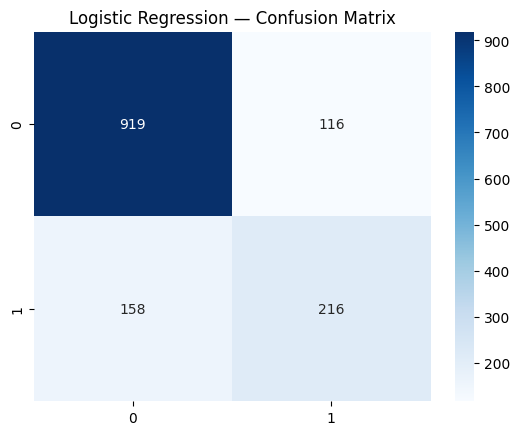

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:,1]

print("📌 Logistic Regression Performance")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr),4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_lr),4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Logistic Regression — Confusion Matrix")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("📌 Random Forest Performance")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf),4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_rf),4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


📌 Random Forest Performance
Accuracy: 0.7999
ROC AUC: 0.8452

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



🔝 Top 15 Important Features:
Tenure Months                      0.115990
Total Charges                      0.109114
Monthly Charges                    0.088482
CLTV                               0.074796
Latitude                           0.066852
Longitude                          0.065795
Latitude_dec                       0.065592
Longitude_dec                      0.064975
Internet Service_Fiber optic       0.039995
Dependents                         0.033640
Payment Method_Electronic check    0.031356
Contract_Two year                  0.029755
Online Security_Yes                0.017626
Contract_One year                  0.017239
Tech Support_Yes                   0.016894
dtype: float64


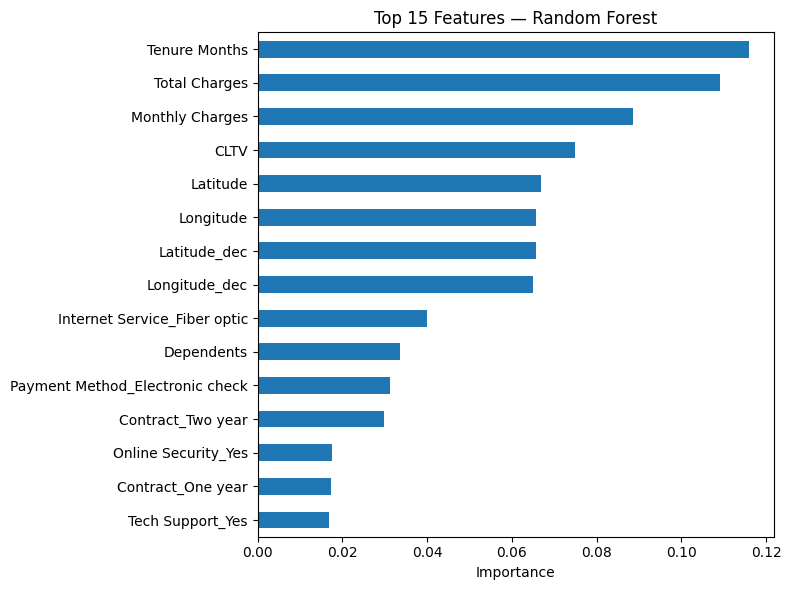

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)

print("🔝 Top 15 Important Features:")
print(feat_imp)

plt.figure(figsize=(8,6))
feat_imp.sort_values().plot(kind='barh')
plt.title("Top 15 Features — Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [31]:
# Diagnostic: check if 'scaler' exists and show a short list of important variables
print("'scaler' in globals():", 'scaler' in globals())
print("'rf' in globals():", 'rf' in globals())
print("'X_train' in globals():", 'X_train' in globals())
print("'X_test' in globals():", 'X_test' in globals())
print("'y_test' in globals():", 'y_test' in globals())

# show first few rows of X_train to confirm it's present
if 'X_train' in globals():
    display(X_train.head())
else:
    print("X_train not found - you need to re-run the train/test split cell first.")


'scaler' in globals(): False
'rf' in globals(): True
'X_train' in globals(): True
'X_test' in globals(): True
'y_test' in globals(): True


,Count,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
4626,1,34.424926,-117.184503,0,0,0,35,0,0,49.20,...,False,False,True,False,True,False,False,False,True,False
4192,1,39.597975,-122.032248,0,1,1,15,1,0,75.10,...,False,False,False,False,False,False,False,False,False,True
5457,1,40.336392,-122.448533,0,1,1,13,0,0,40.55,...,True,False,False,False,False,False,True,False,False,True
4717,1,33.752591,-117.993661,0,1,0,26,1,1,73.50,...,False,False,True,False,True,False,True,True,False,False
4673,1,33.734933,-117.044145,0,1,1,1,1,0,44.55,...,False,False,False,False,False,False,False,False,True,False


In [32]:
# Repair cell: recreate scaler, reapply scaling, recompute preds, save outputs & download CSV
from sklearn.preprocessing import StandardScaler
import joblib, os, pandas as pd
from google.colab import files

# 1) Build numeric_cols automatically (safe)
numeric_cols = [c for c in ['Count','Latitude','Longitude','Tenure Months',
                            'Monthly Charges','Total Charges','CLTV',
                            'Latitude_dec','Longitude_dec'] if c in X_train.columns]
print("Numeric columns to scale:", numeric_cols)

# 2) Recreate scaler and apply
scaler = StandardScaler()
if numeric_cols:
    scaler.fit(X_train[numeric_cols])
    X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
    X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])
    print("Scaler created, fitted, and applied.")
else:
    print("No numeric columns found to scale. Skipping scaling step.")

# 3) Ensure rf exists
if 'rf' not in globals():
    raise NameError("Random Forest 'rf' not found. Re-run the RF training cell and try again.")

# 4) Recompute predictions & probabilities
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# 5) Save outputs
os.makedirs('outputs', exist_ok=True)
X_test_copy = X_test.copy()
X_test_copy['true_churn'] = y_test.values
X_test_copy['pred_proba'] = y_proba_rf
X_test_copy['pred_label'] = y_pred_rf

top100 = X_test_copy.sort_values('pred_proba', ascending=False).head(100)
top100_path = 'outputs/top100_at_risk_customers.csv'
top100.to_csv(top100_path, index=False)
joblib.dump(rf, 'outputs/churn_rf_model.joblib')
joblib.dump(scaler, 'outputs/scaler.joblib')

print("Saved files:")
print("-", top100_path)
print("- outputs/churn_rf_model.joblib")
print("- outputs/scaler.joblib")

# 6) List outputs and trigger download of CSV to your local machine
print("\nOutputs folder contents:", os.listdir('outputs'))
files.download(top100_path)


Numeric columns to scale: ['Count', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Latitude_dec', 'Longitude_dec']
Scaler created, fitted, and applied.
Saved files:
- outputs/top100_at_risk_customers.csv
- outputs/churn_rf_model.joblib
- outputs/scaler.joblib

Outputs folder contents: ['churn_rf_model.joblib', 'scaler.joblib', 'top100_at_risk_customers.csv']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import joblib, pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# load model + scaler
rf = joblib.load('outputs/churn_rf_model.joblib')
scaler = joblib.load('outputs/scaler.joblib')

# load test set if still in memory; otherwise reload X_test/y_test from earlier cells
# If X_test and y_test are present in your environment, run:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),4))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# top features
import pandas as pd
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
print("\nTop 10 features:\n", feat_imp)


Accuracy: 0.6565
ROC AUC: 0.7949

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.71      1035
           1       0.43      0.85      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.68      1409


Top 10 features:
 Tenure Months                   0.115990
Total Charges                   0.109114
Monthly Charges                 0.088482
CLTV                            0.074796
Latitude                        0.066852
Longitude                       0.065795
Latitude_dec                    0.065592
Longitude_dec                   0.064975
Internet Service_Fiber optic    0.039995
Dependents                      0.033640
dtype: float64
